In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

np.random.seed(42)

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

x, y = make_moons(n_samples=500, noise=0.30, random_state=42)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

def plot_data():
    plt.plot(x[:, 0][y==0], x[:, 1][y==0], '+')
    plt.plot(x[:, 0][y==1], x[:, 1][y==1], 'x')
    plt.axis([-1.5, 2.5, -1, 1.5])

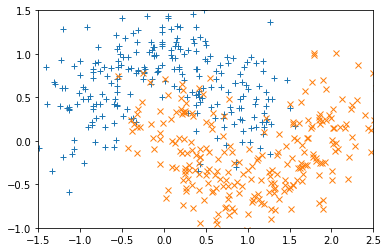

In [3]:
plt.figure()
plot_data()
plt.show()

In [4]:
from sklearn.metrics import accuracy_score

def fit_and_evaluate(clf):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

Voting

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

log_clf = LogisticRegression(solver='liblinear', random_state=42)
fit_and_evaluate(log_clf)

rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)
fit_and_evaluate(rnd_clf)

svm_clf = SVC(gamma='auto', random_state=42)
fit_and_evaluate(svm_clf)

LogisticRegression 0.864
RandomForestClassifier 0.872
SVC 0.888


In [6]:
from sklearn.ensemble import VotingClassifier

log_clf = LogisticRegression(solver='liblinear', random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)
svm_clf = SVC(gamma='auto', random_state=42)

voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)], 
                              voting='hard')
fit_and_evaluate(voting_clf)

VotingClassifier 0.896


In [7]:
log_clf = LogisticRegression(solver='liblinear', random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)
svm_clf = SVC(gamma='auto', probability=True, random_state=42)

voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)], 
                              voting='soft')
fit_and_evaluate(voting_clf)

VotingClassifier 0.912


Bagging

In [8]:
def plot_decision_boundary(clf):
    axis = [-1.5, 2.5, -1, 1.5]
    x1s = np.linspace(axis[0], axis[1], 100)
    x2s = np.linspace(axis[2], axis[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    xs = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(xs).reshape(x1.shape)
    plt.contourf(x1, x2, y_pred, alpha=0.3)
    plt.axis(axis)

DecisionTreeClassifier 0.856


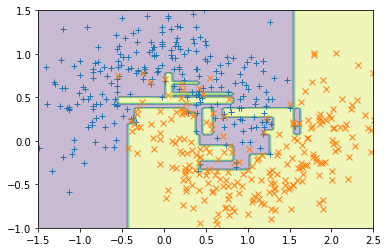

In [9]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
fit_and_evaluate(tree_clf)

plot_data()
plot_decision_boundary(tree_clf)

BaggingClassifier 0.904


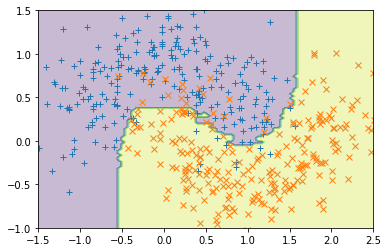

In [10]:
from sklearn.ensemble import BaggingClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)

fit_and_evaluate(bag_clf)

plot_data()
plot_decision_boundary(bag_clf)

In [11]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    bootstrap=True, n_jobs=-1, oob_score=True, random_state=40)

fit_and_evaluate(bag_clf)

bag_clf.oob_score_

BaggingClassifier 0.912


0.9013333333333333

Pasting

BaggingClassifier 0.912


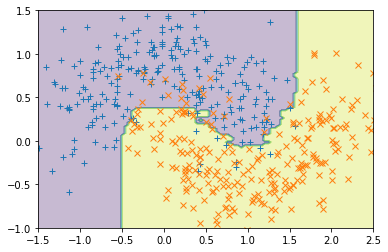

In [12]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=False, n_jobs=-1, random_state=42)

fit_and_evaluate(bag_clf)

plot_data()
plot_decision_boundary(bag_clf)

Random Forests

RandomForestClassifier 0.912


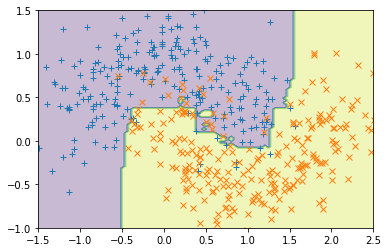

In [13]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)

fit_and_evaluate(rnd_clf)

plot_data()
plot_decision_boundary(rnd_clf)